In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_json(open("yelp_dataset/yelp_academic_dataset_business.json"), orient='columns',lines=True)
df_users = pd.read_json(open("yelp_dataset/yelp_academic_dataset_user.json"), orient='columns',lines=True)

OSError: [Errno 22] Invalid argument

In [6]:
print(df.columns)
print(df.describe())

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')
             is_open       latitude      longitude   review_count  \
count  188593.000000  188587.000000  188587.000000  188593.000000   
mean        0.830391      38.506793     -97.490873      31.797310   
std         0.375290       5.122684      17.693360     104.124212   
min         0.000000     -71.753941    -180.000000       3.000000   
25%         1.000000      33.630878    -112.279276       4.000000   
50%         1.000000      36.143595    -111.777460       9.000000   
75%         1.000000      43.593106     -79.982958      24.000000   
max         1.000000      85.051129     115.086769    7968.000000   

               stars  
count  188593.000000  
mean        3.631550  
std         1.016783  
min         1.000000  
25%         3.000000  
50%         3.50

In [7]:
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
address         188593 non-null object
attributes      162807 non-null object
business_id     188593 non-null object
categories      188052 non-null object
city            188593 non-null object
hours           143791 non-null object
is_open         188593 non-null int64
latitude        188587 non-null float64
longitude       188587 non-null float64
name            188593 non-null object
neighborhood    188593 non-null object
postal_code     188593 non-null object
review_count    188593 non-null int64
stars           188593 non-null float64
state           188593 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB
None


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


In [18]:
print(df['city'].isnull().values.sum())
print(df['categories'].isnull().values.sum())

0
541


In [9]:
print(df['city'].value_counts())

Las Vegas                  28865
Phoenix                    18633
Toronto                    18233
Charlotte                   9204
Scottsdale                  8822
Calgary                     7384
Pittsburgh                  6804
Mesa                        6239
Montréal                    6045
Henderson                   4815
Tempe                       4492
Chandler                    4272
Madison                     3509
Cleveland                   3506
Glendale                    3469
Gilbert                     3397
Mississauga                 2954
Peoria                      1868
Markham                     1699
North Las Vegas             1508
Champaign                   1243
Scarborough                 1175
North York                  1140
Surprise                    1119
Richmond Hill                978
Concord                      975
Brampton                     929
Vaughan                      853
Goodyear                     827
Etobicoke                    760
          

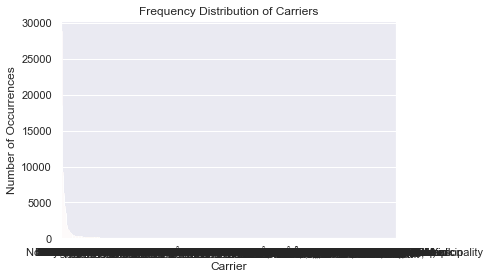

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
carrier_count = df['city'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values)
plt.show()

In [21]:
print(df['categories'].value_counts())

from collections import defaultdict
categories = defaultdict(int)
for c in df['categories']:
    if c is not None:
        parts = c.strip().split(",")
        for p in parts:
            categories[c.strip()] += 1
print(len(categories))

Restaurants, Pizza                                                                                                                                               1092
Pizza, Restaurants                                                                                                                                               1060
Coffee & Tea, Food                                                                                                                                               1036
Nail Salons, Beauty & Spas                                                                                                                                       1015
Beauty & Spas, Nail Salons                                                                                                                                        981
Food, Coffee & Tea                                                                                                                                                966
Rest

85056


In [101]:
df = df.loc[df['city'] == 'Las Vegas']

# categories_df = df['categories'].str.split(',', expand=True)
b = pd.DataFrame(df['categories'].str.split(',').tolist(), index=df['business_id']).stack()
b = b.reset_index()[[0, 'business_id']] # var1 variable is currently labeled 0

# df = pd.concat([pd.Series(row['city'], row['business_id'], row['categories'].split(','))              
#                     for _, row in df.iterrows()])

print(b)

# from collections import defaultdict

# categories = []
# categories_count = defaultdict(int)
# for index, row in df.iterrows():
#     category = row['categories']
#     if category is None or c == "":
#         none += 1
#         continue

#     parts = category.split(",")
#     for item in ['Restaurants','Restaurant','Food']:
#         if item in parts:
#             parts = list(filter((item).__ne__, parts))
    
#             category = ",".join(parts)
#             categories.append(category)
#             categories_count[category] += 1

# all_categories = pd.DataFrame({'categories':categories})
# print(all_categories['categories'].value_counts())

# all_categories.to_csv("all_categories.csv")
# open("categories_count.txt","w").write(str(categories_count))

# ('Restaurant' in df['categories'] or 'Restaurants' in df['categories'] or 'Food' in df['categories'])

# df['categories'].filter(like='Restaurants ', axis=0)

# print(df.count())


# print()
# print(len(categories))
# print(none)
# print(df['categories'].isnull().values.sum())
# open("vegas_categories.txt","w").write(str(categories))

# all_categories = pd.DataFrame({'categories':temp})
# all_categories = all_categories['categories'].str.split(',', expand=True)
# series = []
# for b in categories_df:
#     series.append(categories_df[b])
# all_categories = pd.concat(series)
# print(all_categories['categories'].value_counts())

                                0             business_id
0          American (Traditional)  vJIuDBdu01vCA8y1fwR1OQ
1                            Food  vJIuDBdu01vCA8y1fwR1OQ
2                        Bakeries  vJIuDBdu01vCA8y1fwR1OQ
3                     Restaurants  vJIuDBdu01vCA8y1fwR1OQ
4                       Fast Food  kgffcoxT6BQp-gJ-UQ7Czw
5                     Restaurants  kgffcoxT6BQp-gJ-UQ7Czw
6                      Sandwiches  kgffcoxT6BQp-gJ-UQ7Czw
7                            Beer  0jtRI7hVMpQHpUVtUy4ITw
8                  Wine & Spirits  0jtRI7hVMpQHpUVtUy4ITw
9                         Italian  0jtRI7hVMpQHpUVtUy4ITw
10                           Food  0jtRI7hVMpQHpUVtUy4ITw
11         American (Traditional)  0jtRI7hVMpQHpUVtUy4ITw
12             Breakfast & Brunch  0jtRI7hVMpQHpUVtUy4ITw
13                    Restaurants  0jtRI7hVMpQHpUVtUy4ITw
14                        Mexican  JJEx5wIqs9iGGATOagE8Sg
15                    Restaurants  JJEx5wIqs9iGGATOagE8Sg
16            